In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook()

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-10-09 
Git hash: c5425d3c436714fc2475c8e5525cbd28738fd3eb


In [3]:
# Connect to data store
store = pd.HDFStore('../sra.h5', mode='r')

In [4]:
strand = store.select('prealn/workflow/collectrnaseqmetrics/second', columns='PCT_CORRECT_STRAND_READS')

In [40]:
well_stranded = store.select('prealn/workflow/collectrnaseqmetrics/second', 
             where='PCT_CORRECT_STRAND_READS >= .99', 
             columns=['PCT_CORRECT_STRAND_READS']
            ).index.get_level_values('srx').unique().tolist()

In [13]:
quality_ranks = pd.read_csv('../output/quality-wf/rnaseq_srx_quality_ranks.tsv', sep='\t', index_col=0)

In [22]:
library_strategy = pd.read_parquet('../output/metadata-wf/random_forest_library_strategy.parquet')

In [33]:
rnaseq = library_strategy.reset_index()\
    .melt(id_vars='srx')\
    .groupby('srx').value\
    .value_counts()\
    .unstack()['RNA-Seq']

rnaseq = rnaseq[rnaseq == 20]

In [43]:
stranded_rnaseq = []
for srx in well_stranded:
    if srx in rnaseq.index:
        stranded_rnaseq.append(srx)

In [48]:
stranded_quality = quality_ranks.reindex(stranded_rnaseq)
stranded_quality.sort_values(by='quality_rank', inplace=True)

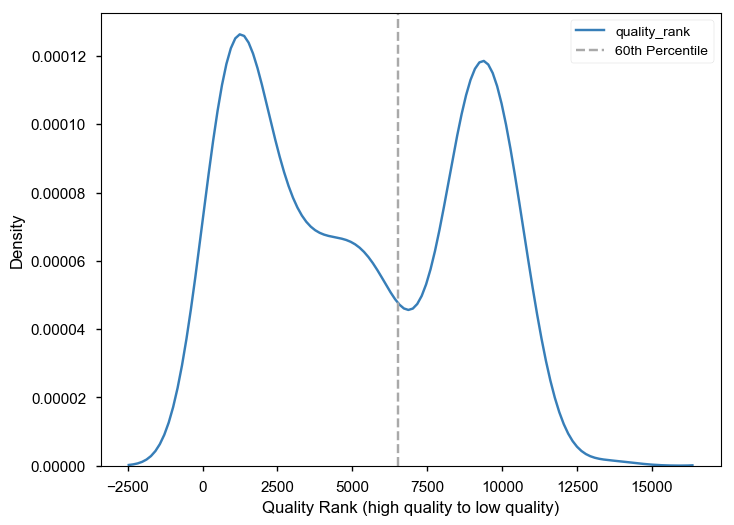

In [74]:
ax = sns.kdeplot(stranded_quality.quality_rank)
ax.axvline(np.percentile(stranded_quality.quality_rank, 60), color='darkgrey', ls='--', label='60th Percentile')
plt.xlabel('Quality Rank (high quality to low quality)')
plt.ylabel('Density')
plt.legend();

In [100]:
cutoff = np.percentile(stranded_quality.quality_rank, 60)

In [101]:
uber_srx = stranded_quality[stranded_quality.quality_rank < cutoff].index.unique().tolist()

In [107]:
len(uber_srx)

1374

In [102]:
metadata = pd.read_csv('../output/geo-wf/rnaseq_metadata.tsv', sep='\t', index_col=0)

In [103]:
metadata = metadata.reindex(uber_srx)

In [104]:
metadata.tissue.value_counts()

whole body                                          539
ovary                                                65
embryo                                               49
head                                                 44
wing disc                                            20
gut                                                  20
antenna                                              18
imaginal disc                                        15
gonad                                                15
digestive system                                     13
thorax without digestive system                      11
head and thorax                                      11
indirect flight muscle                               10
abdomen without digestive or reproductive system     10
fat body                                             10
eye disc                                             10
reproductive system without gonad and genitalia      10
ventral nerve cord                              

In [105]:
metadata['cell type'].value_counts()

S2R+              21
neuroblast        13
S2                 5
gut progenitor     2
Name: cell type, dtype: int64

In [106]:
metadata['developmental stage'].value_counts()

adult                               372
adult stage 0-10 days               113
third instar larval stage           105
larval stage                         59
pupal stage                          59
embryonic stage 2 h (ael)            28
embryonic stage 2-3 h (ael)           9
embryonic stage                       8
pupal stage 40 h (apf)                6
pupal stage 72 h (apf)                6
embryonic stage 2-4 h (ael)           6
pupal stage 8 h (apf)                 6
embryonic stage 6-8 h (ael)           4
embryonic stage 10-12 h (ael)         4
embryonic stage 0-4 h (ael)           3
pupal stage 48 h (apf)                3
pupal stage 90 h (apf)                2
pupal stage 30 h (apf)                2
embryonic stage 0.75 h (ael)          1
first instar larval stage             1
embryonic stage 0.75-1.5 h (ael)      1
embryonic stage 12-18 h (ael)         1
embryonic stage 6-12 h (ael)          1
embryonic stage 18-24 h (ael)         1
pupal stage 24 h (apf)                1


In [108]:
metadata['contact'].value_counts()

[autoreload of numpy failed: Traceback (most recent call last):
  File "/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/numpy/__init__.py", line 156, in <module>

Brian Oliver <briano@helix.nih.gov>                          287
Fiona Ingleby <f.ingleby@sussex.ac.uk>                       178
Jun Chen <cjnankai@gmail.com>                                 96
Yuheng Huang <yuheng.huang.sysu@gmail.com>                    45
Stein Aerts <Stein.Aerts@med.kuleuven.be>                     41
Michael Antosh <Michael_Antosh@brown.edu>                     32
Michael Elgart <elgart@gmail.com>                             28
Jean-Yves Roignant <j.roignant@imb-mainz.de>                  27
Corbin Jones <cdjones@email.unc.edu>                          24
Chris Seidel <seidel@phageT4.org>                             24
Carl Thummel <cthummel@genetics.utah.edu>                     20
Benoit Biteau <benoit_biteau@urmc.rochester.edu>              19
Tadeusz Kawecki <tadeusz.kawecki@unil.ch>                     19
John Tower <jtower@usc.edu>                                   18
Naren Srinivasan <naren.srinivasan@crick.ac.uk>               18
Jelle Jacobs <jelle.jacob